In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as st
import math

In [7]:
df = pd.read_excel('/content/Case_Data_Mapin.xlsx')
df.head()

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik A (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik B (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik C (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik D (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik E (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam),Statik SES Grup A+ (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup A (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup B (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup C (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup D (Nokta Çevresinde Yaşayan Kişi Sayısı)
0,0,MECRA KADIKÖY,[mecra],İstanbul,Kadıköy,871,4.145522,2.5,4.8,15.4,32.5,37.5,7.2,12020.0,920,1703,1246,764,664
1,1,NO .11,11 Kadıköy,İstanbul,Kadıköy,1597,4.537383,2.1,5.2,15.6,31.8,39.4,5.9,7764.0,744,1397,1093,676,598
2,2,1.A BİRAHANESİ,1A Meyhanesi,İstanbul,Kadıköy,264,4.400000,1.9,4.0,13.0,32.8,39.8,8.5,7364.0,619,782,879,521,456
3,3,İKİ BUÇUK CAFE PUB,2 Buçuk Cafe & Bistro,İstanbul,Şişli,3,5.000000,4.8,5.5,23.9,32.9,29.3,3.5,22288.0,608,898,817,470,405
4,4,39 KALAMIŞ MARINA H,39 Kalamis Marina Hotel & Restaurant,İstanbul,Kadıköy,211,4.600000,0.8,3.7,12.0,31.7,43.2,8.5,2768.0,1083,1537,1017,583,443


In [8]:
df.shape

(1245, 19)

#İl Bazında Mekan Sayısını Öğrendim

In [9]:
df["il"].unique()
df["il"].value_counts()

İstanbul    878
İzmir       367
Name: il, dtype: int64

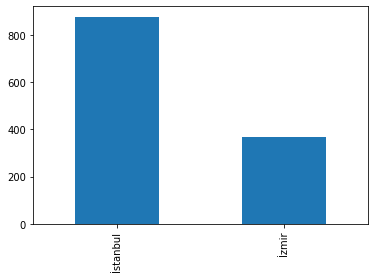

In [10]:
df["il"].value_counts().plot(kind='bar')

#İlçe Bazında Mekan Sayısını Öğrendim

In [11]:
df["ilçe"].unique()
df["ilçe"].value_counts()

Kadıköy       497
Konak         367
Şişli         317
Beylikdüzü     64
Name: ilçe, dtype: int64

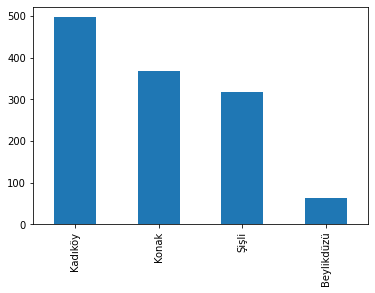

In [12]:
df["ilçe"].value_counts().plot(kind='bar')

#Analiz Etmek İçin Statik SES Gruplarının Toplamından Sütun Oluşturdum

In [13]:
Statik_cols = [col for col in df.columns if 'Statik' in col]
df['statik toplam'] = df[Statik_cols].sum(axis=1)

#Dinamik ve Statis SES'lere Göre En Çok Müşteri Çeken Mekanların İncelemesi

In [14]:
df.sort_values("Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam)", ascending = False).head(20)

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik A (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik B (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik C (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik D (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik E (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam),Statik SES Grup A+ (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup A (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup B (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup C (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup D (Nokta Çevresinde Yaşayan Kişi Sayısı),statik toplam
1019,1019,FASIL RESTAURANT,Fasıl Restaurant,İstanbul,Kadıköy,1033,3.445015,2.4,4.5,16.3,31.7,38.1,7.0,38472.0,685,1296,1043,647,576,4247
376,376,HARLEM,Harlem PUB - JAZZ & BLUES,İstanbul,Kadıköy,152,4.500000,2.0,4.3,16.5,31.2,37.9,8.1,38134.0,564,1125,1102,700,648,4139
745,745,SAFRAN PUB,Safran Meyhane,İstanbul,Kadıköy,827,4.212878,2.0,4.3,16.5,31.2,37.9,8.1,38134.0,564,1125,1102,700,648,4139
547,547,MANGİAMO,Mangıamo Cafe & Bistro,İstanbul,Şişli,881,4.149035,5.4,7.2,25.2,31.1,27.4,3.7,37914.0,223,405,363,223,181,1395
650,650,ZERVAN OCAKBAŞI,Ocakbaşı Zervan Restaurant,İstanbul,Şişli,387,4.224031,7.8,9.0,31.7,25.7,25.1,0.6,37914.0,223,405,363,223,181,1395
202,202,SUSHİ EXPRESS TRUMP,Chinese & Sushi Express,İstanbul,Şişli,603,3.797181,5.8,6.9,27.5,29.6,27.1,3.2,37397.0,608,898,817,470,405,3198
988,988,CHINESE EXPRESS,Chinese & Sushi Express,İstanbul,Kadıköy,270,4.200000,2.9,5.8,18.3,33.0,35.2,4.8,37397.0,852,1562,1088,662,568,4732
497,497,KORUÇAM RESTAURANT,Koruçam Restaurant & Ocakbaşı,İstanbul,Kadıköy,70,4.277143,2.2,4.2,14.7,30.7,39.3,9.0,32507.0,685,1296,1043,647,576,4247
1140,1140,NaN,No.1 HotPot/BBQ Çin mutfağı 1号铺火锅中餐,İstanbul,Şişli,159,4.105660,4.6,7.6,29.1,27.9,27.3,3.5,32151.0,223,405,363,223,181,1395
586,586,MIDPOINT TRUMP AVM,Midpoint Trump Towers,İstanbul,Şişli,6494,4.008770,5.4,6.5,28.4,29.3,27.8,2.6,30192.0,608,898,817,470,405,3198


In [15]:
df.sort_values("statik toplam", ascending = False).head(20)

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik A (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik B (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik C (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik D (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik E (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam),Statik SES Grup A+ (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup A (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup B (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup C (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup D (Nokta Çevresinde Yaşayan Kişi Sayısı),statik toplam
921,921,YÖREM RESTAURANT,YÖREM BİRAHANESİ,İstanbul,Şişli,19,4.300000,2.4,3.8,13.3,31.0,41.5,8.0,NaN,1033,1916,2628,1614,1415,8606
546,546,MAM'S,Mama's Bakery,İstanbul,Şişli,270,3.641481,2.5,3.1,9.9,27.7,47.9,8.9,NaN,1033,1916,2628,1614,1415,8606
767,767,SEÇKİN RESTAURANT,Seçkin Restaurant,İstanbul,Şişli,74,4.237838,6.3,7.5,30.3,27.9,25.2,2.7,14755.0,1033,1916,2628,1614,1415,8606
1052,1052,NaN,JUKEBOX RAW CULTURE,İstanbul,Şişli,278,4.516187,5.5,7.1,29.0,27.6,28.2,2.5,14755.0,1033,1916,2628,1614,1415,8606
399,399,FAİRMOND HOTEL,Hotel Fairmont Quasar Istanbul,İstanbul,Şişli,2743,4.597813,4.2,5.0,22.9,32.4,31.2,4.2,3837.0,1033,1916,2628,1614,1415,8606
1115,1115,MERCURE BOMONTİ,Mercure Istanbul Bomonti,İstanbul,Şişli,1702,3.700000,6.0,8.8,30.8,26.7,25.2,2.5,8969.0,1357,2600,2137,1302,1096,8492
737,737,RUMELİ PUB,Rumeli Pub,İstanbul,Şişli,173,4.076301,5.7,7.2,30.2,29.4,25.1,2.4,9232.0,1357,2600,2137,1302,1096,8492
1091,1091,NaN,La Wisteria Boutique Hotel Istanbul,İstanbul,Şişli,190,4.100000,6.6,8.1,33.0,27.3,23.5,1.5,4747.0,1357,2600,2137,1302,1096,8492
773,773,SEYMEN OCAKBAŞI,SEYMEN KÖFTE SALONU,İstanbul,Şişli,32,4.343750,1.8,4.6,11.5,28.2,45.7,8.1,8345.0,1357,2600,2137,1302,1096,8492
872,872,TÜRKÜ KONAĞI,Türkü Konağı,İstanbul,Şişli,25,4.104000,2.5,3.7,9.7,29.6,41.8,12.6,NaN,742,1452,2773,1666,1272,7905


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 20 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Unnamed: 0                                                                        1245 non-null   int64  
 1   Nokta Adı                                                                         1080 non-null   object 
 2   Google Isim                                                                       1245 non-null   object 
 3   il                                                                                1245 non-null   object 
 4   ilçe                                                                              1245 non-null   object 
 5   Web-Kişi Sayısı Toplamı                                                           1245 non-null   int64  
 6   

#Nokta Adında Boş Olan Yerleri Google İsmine Göre Doldurdum

In [17]:
df["Nokta Adı"].fillna(value=df["Google Isim"], inplace=True)

In [18]:
df.tail()

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik A (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik B (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik C (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik D (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik E (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam),Statik SES Grup A+ (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup A (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup B (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup C (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup D (Nokta Çevresinde Yaşayan Kişi Sayısı),statik toplam
1240,1240,Yolo Art&Lounge,Yolo Art&Lounge,İzmir,Konak,1961,4.610760,2.4,4.5,14.0,32.8,37.2,9.1,11146.0,5,13,30,17,19,84
1241,1241,YSABEL RESTAURANT,YSABEL RESTAURANT,İstanbul,Kadıköy,411,4.421411,3.0,4.5,13.8,33.3,37.9,7.5,1980.0,1100,1257,825,432,315,3929
1242,1242,Zamantaşı Ocakbaşı,Zamantaşı Ocakbaşı,İstanbul,Şişli,72,4.135417,5.3,7.8,28.8,29.2,25.9,3.0,6824.0,962,898,917,569,473,3819
1243,1243,Zucca Pizza & Cafe,Zucca Pizza & Cafe,İstanbul,Şişli,1290,4.609419,4.7,5.0,28.5,29.7,28.4,3.8,9103.0,1110,1655,1871,1152,1018,6806
1244,1244,Zula istanbul,Zula istanbul,İstanbul,Şişli,2670,4.366929,6.8,8.3,30.9,27.4,24.0,2.7,3215.0,285,554,392,229,199,1659


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 20 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Unnamed: 0                                                                        1245 non-null   int64  
 1   Nokta Adı                                                                         1245 non-null   object 
 2   Google Isim                                                                       1245 non-null   object 
 3   il                                                                                1245 non-null   object 
 4   ilçe                                                                              1245 non-null   object 
 5   Web-Kişi Sayısı Toplamı                                                           1245 non-null   int64  
 6   

In [20]:
df.head()

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik A (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik B (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik C (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik D (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik E (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %),Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam),Statik SES Grup A+ (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup A (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup B (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup C (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup D (Nokta Çevresinde Yaşayan Kişi Sayısı),statik toplam
0,0,MECRA KADIKÖY,[mecra],İstanbul,Kadıköy,871,4.145522,2.5,4.8,15.4,32.5,37.5,7.2,12020.0,920,1703,1246,764,664,5297
1,1,NO .11,11 Kadıköy,İstanbul,Kadıköy,1597,4.537383,2.1,5.2,15.6,31.8,39.4,5.9,7764.0,744,1397,1093,676,598,4508
2,2,1.A BİRAHANESİ,1A Meyhanesi,İstanbul,Kadıköy,264,4.400000,1.9,4.0,13.0,32.8,39.8,8.5,7364.0,619,782,879,521,456,3257
3,3,İKİ BUÇUK CAFE PUB,2 Buçuk Cafe & Bistro,İstanbul,Şişli,3,5.000000,4.8,5.5,23.9,32.9,29.3,3.5,22288.0,608,898,817,470,405,3198
4,4,39 KALAMIŞ MARINA H,39 Kalamis Marina Hotel & Restaurant,İstanbul,Kadıköy,211,4.600000,0.8,3.7,12.0,31.7,43.2,8.5,2768.0,1083,1537,1017,583,443,4663


#Dinamik Toplamda Boşlukları Ortalama Değerine Göre Doldurdum

In [21]:
df["Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam)"] = df["Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam)"].fillna(df["Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam)"].mean())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 20 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Unnamed: 0                                                                        1245 non-null   int64  
 1   Nokta Adı                                                                         1245 non-null   object 
 2   Google Isim                                                                       1245 non-null   object 
 3   il                                                                                1245 non-null   object 
 4   ilçe                                                                              1245 non-null   object 
 5   Web-Kişi Sayısı Toplamı                                                           1245 non-null   int64  
 6   

#Dinamik Kolonlardaki Yüzdelik Değerlerin Kişi Sayısına Çevrilmesi

In [23]:
Dinamik_Cols = [col for col in df.columns if ('Dinamik' in col) & ('Toplam' not in col)]
for col in Dinamik_Cols:
  df[col] = (df[col]*df['Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam)'])/100

  

In [24]:
df.rename(columns={'Dinamik A+ (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %)':'Dinamik A+ Çevreden Kişi Sayısı','Dinamik A (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %)':'Dinamik A Çevreden Kişi Sayısı','Dinamik B (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %)':'Dinamik B Çevreden Kişi Sayısı','Dinamik C (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %)':'Dinamik C Çevreden Kişi Sayısı','Dinamik D (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %)': 'Dinamik D Çevreden Kişi Sayısı','Dinamik E (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Oranı %)': 'Dinamik E Çevreden Kişi Sayısı'},inplace=True)
df.head()

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ Çevreden Kişi Sayısı,Dinamik A Çevreden Kişi Sayısı,Dinamik B Çevreden Kişi Sayısı,Dinamik C Çevreden Kişi Sayısı,Dinamik D Çevreden Kişi Sayısı,Dinamik E Çevreden Kişi Sayısı,Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam),Statik SES Grup A+ (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup A (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup B (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup C (Nokta Çevresinde Yaşayan Kişi Sayısı),Statik SES Grup D (Nokta Çevresinde Yaşayan Kişi Sayısı),statik toplam
0,0,MECRA KADIKÖY,[mecra],İstanbul,Kadıköy,871,4.145522,300.500,576.960,1851.080,3906.500,4507.500,865.440,12020.0,920,1703,1246,764,664,5297
1,1,NO .11,11 Kadıköy,İstanbul,Kadıköy,1597,4.537383,163.044,403.728,1211.184,2468.952,3059.016,458.076,7764.0,744,1397,1093,676,598,4508
2,2,1.A BİRAHANESİ,1A Meyhanesi,İstanbul,Kadıköy,264,4.400000,139.916,294.560,957.320,2415.392,2930.872,625.940,7364.0,619,782,879,521,456,3257
3,3,İKİ BUÇUK CAFE PUB,2 Buçuk Cafe & Bistro,İstanbul,Şişli,3,5.000000,1069.824,1225.840,5326.832,7332.752,6530.384,780.080,22288.0,608,898,817,470,405,3198
4,4,39 KALAMIŞ MARINA H,39 Kalamis Marina Hotel & Restaurant,İstanbul,Kadıköy,211,4.600000,22.144,102.416,332.160,877.456,1195.776,235.280,2768.0,1083,1537,1017,583,443,4663


In [25]:
df.rename(columns={'Statik SES Grup A+ (Nokta Çevresinde Yaşayan Kişi Sayısı)':'Statik A+ Noktadan Kişi Sayısı','Statik SES Grup A (Nokta Çevresinde Yaşayan Kişi Sayısı)':'Statik A Noktadan Kişi Sayısı','Statik SES Grup B (Nokta Çevresinde Yaşayan Kişi Sayısı)':'Statik B Noktadan Kişi Sayısı','Statik SES Grup C (Nokta Çevresinde Yaşayan Kişi Sayısı)':'Statik C Noktadan Kişi Sayısı','Statik SES Grup D (Nokta Çevresinde Yaşayan Kişi Sayısı)':'Statik D Noktadan Kişi Sayısı'},inplace=True)
df.head()

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ Çevreden Kişi Sayısı,Dinamik A Çevreden Kişi Sayısı,Dinamik B Çevreden Kişi Sayısı,Dinamik C Çevreden Kişi Sayısı,Dinamik D Çevreden Kişi Sayısı,Dinamik E Çevreden Kişi Sayısı,Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam),Statik A+ Noktadan Kişi Sayısı,Statik A Noktadan Kişi Sayısı,Statik B Noktadan Kişi Sayısı,Statik C Noktadan Kişi Sayısı,Statik D Noktadan Kişi Sayısı,statik toplam
0,0,MECRA KADIKÖY,[mecra],İstanbul,Kadıköy,871,4.145522,300.500,576.960,1851.080,3906.500,4507.500,865.440,12020.0,920,1703,1246,764,664,5297
1,1,NO .11,11 Kadıköy,İstanbul,Kadıköy,1597,4.537383,163.044,403.728,1211.184,2468.952,3059.016,458.076,7764.0,744,1397,1093,676,598,4508
2,2,1.A BİRAHANESİ,1A Meyhanesi,İstanbul,Kadıköy,264,4.400000,139.916,294.560,957.320,2415.392,2930.872,625.940,7364.0,619,782,879,521,456,3257
3,3,İKİ BUÇUK CAFE PUB,2 Buçuk Cafe & Bistro,İstanbul,Şişli,3,5.000000,1069.824,1225.840,5326.832,7332.752,6530.384,780.080,22288.0,608,898,817,470,405,3198
4,4,39 KALAMIŞ MARINA H,39 Kalamis Marina Hotel & Restaurant,İstanbul,Kadıköy,211,4.600000,22.144,102.416,332.160,877.456,1195.776,235.280,2768.0,1083,1537,1017,583,443,4663


In [26]:
df["Dinamik A+ Çevreden Kişi Sayısı"]=df["Dinamik A+ Çevreden Kişi Sayısı"].astype(int)
df["Dinamik A Çevreden Kişi Sayısı"]=df["Dinamik A Çevreden Kişi Sayısı"].astype(int)
df["Dinamik B Çevreden Kişi Sayısı"]=df["Dinamik B Çevreden Kişi Sayısı"].astype(int)
df["Dinamik C Çevreden Kişi Sayısı"]=df["Dinamik C Çevreden Kişi Sayısı"].astype(int)
df["Dinamik D Çevreden Kişi Sayısı"]=df["Dinamik D Çevreden Kişi Sayısı"].astype(int)
df["Dinamik E Çevreden Kişi Sayısı"]=df["Dinamik E Çevreden Kişi Sayısı"].astype(int)

df.head()

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ Çevreden Kişi Sayısı,Dinamik A Çevreden Kişi Sayısı,Dinamik B Çevreden Kişi Sayısı,Dinamik C Çevreden Kişi Sayısı,Dinamik D Çevreden Kişi Sayısı,Dinamik E Çevreden Kişi Sayısı,Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam),Statik A+ Noktadan Kişi Sayısı,Statik A Noktadan Kişi Sayısı,Statik B Noktadan Kişi Sayısı,Statik C Noktadan Kişi Sayısı,Statik D Noktadan Kişi Sayısı,statik toplam
0,0,MECRA KADIKÖY,[mecra],İstanbul,Kadıköy,871,4.145522,300,576,1851,3906,4507,865,12020.0,920,1703,1246,764,664,5297
1,1,NO .11,11 Kadıköy,İstanbul,Kadıköy,1597,4.537383,163,403,1211,2468,3059,458,7764.0,744,1397,1093,676,598,4508
2,2,1.A BİRAHANESİ,1A Meyhanesi,İstanbul,Kadıköy,264,4.400000,139,294,957,2415,2930,625,7364.0,619,782,879,521,456,3257
3,3,İKİ BUÇUK CAFE PUB,2 Buçuk Cafe & Bistro,İstanbul,Şişli,3,5.000000,1069,1225,5326,7332,6530,780,22288.0,608,898,817,470,405,3198
4,4,39 KALAMIŞ MARINA H,39 Kalamis Marina Hotel & Restaurant,İstanbul,Kadıköy,211,4.600000,22,102,332,877,1195,235,2768.0,1083,1537,1017,583,443,4663


#İlçelerin Ortalama Müşteri Sayısı

In [27]:
df.groupby("ilçe").agg({"Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam)":"mean"}).sort_values("Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam)", ascending = False).head()

,Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam)
ilçe,
Şişli,10577.779748
Konak,8848.450982
Kadıköy,8411.743774
Beylikdüzü,7716.278218


#Web Puanı ve Web Kişi Sayısı Toplamı Scale Edildi

In [28]:
df['Web Puanı']=df["Web Puanı"]*20
scaler= MinMaxScaler((1,100))
df['Web-Kişi Sayısı Toplamı']= pd.DataFrame(scaler.fit_transform(df['Web-Kişi Sayısı Toplamı'].values.reshape(-1,1)))
df.head()

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ Çevreden Kişi Sayısı,Dinamik A Çevreden Kişi Sayısı,Dinamik B Çevreden Kişi Sayısı,Dinamik C Çevreden Kişi Sayısı,Dinamik D Çevreden Kişi Sayısı,Dinamik E Çevreden Kişi Sayısı,Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam),Statik A+ Noktadan Kişi Sayısı,Statik A Noktadan Kişi Sayısı,Statik B Noktadan Kişi Sayısı,Statik C Noktadan Kişi Sayısı,Statik D Noktadan Kişi Sayısı,statik toplam
0,0,MECRA KADIKÖY,[mecra],İstanbul,Kadıköy,5.941773,82.910448,300,576,1851,3906,4507,865,12020.0,920,1703,1246,764,664,5297
1,1,NO .11,11 Kadıköy,İstanbul,Kadıköy,10.060863,90.747652,163,403,1211,2468,3059,458,7764.0,744,1397,1093,676,598,4508
2,2,1.A BİRAHANESİ,1A Meyhanesi,İstanbul,Kadıköy,2.497851,88.000000,139,294,957,2415,2930,625,7364.0,619,782,879,521,456,3257
3,3,İKİ BUÇUK CAFE PUB,2 Buçuk Cafe & Bistro,İstanbul,Şişli,1.017021,100.000000,1069,1225,5326,7332,6530,780,22288.0,608,898,817,470,405,3198
4,4,39 KALAMIŞ MARINA H,39 Kalamis Marina Hotel & Restaurant,İstanbul,Kadıköy,2.197146,92.000000,22,102,332,877,1195,235,2768.0,1083,1537,1017,583,443,4663


#Nitelik Seçimi

In [29]:
X = df.iloc[:,[5,6]].values
# Web Puanı ve puan veren kişi sayısı

In [30]:
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Dirsek Metodu Grafiği(Küme Sayısı Belirlemek İçin)

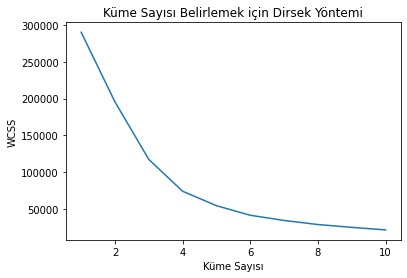

In [31]:
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Küme Sayısı Belirlemek için Dirsek Yöntemi')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()

#Kümeleri Oluşturma ve Yeni Bir Kolona Atama

In [32]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
df["web cluster"] = y_kmeans

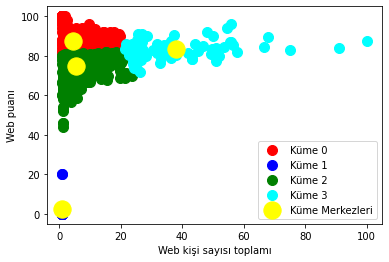

In [33]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Küme 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Küme 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Küme 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Küme 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Küme Merkezleri')
plt.xlabel('Web kişi sayısı toplamı')
plt.ylabel('Web puanı')
plt.legend()
plt.show()

#Kümelere Göre Ağırlık Kullanarak Web Puan Skoru Oluşturma

In [34]:
W_cluster_list=df["web cluster"]
W_kişi_sayi_list=df["Web-Kişi Sayısı Toplamı"]
W_puan_list=df["Web Puanı"]
webSkorList=[]
for i,index in enumerate (W_cluster_list):
  if i == 0:
    sonuc=(W_kişi_sayi_list[i]*0.5+W_puan_list[i]*0.5)*0.7 + 30
    webSkorList.append(sonuc)
  elif i == 2:
    sonuc=(W_kişi_sayi_list[i]*0.5+W_puan_list[i]*0.5)*0.8 + 20
    webSkorList.append(sonuc) 
  elif i == 3:
    sonuc=(W_kişi_sayi_list[i]*0.5+W_puan_list[i]*0.5)*0.6 + 40
    webSkorList.append(sonuc)  
  else:
    sonuc=(W_kişi_sayi_list[i]*0.5+W_puan_list[i]*0.5)*0.9 + 10
    webSkorList.append(sonuc) 
df["Web Skor"] = webSkorList
df.head()    

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ Çevreden Kişi Sayısı,Dinamik A Çevreden Kişi Sayısı,Dinamik B Çevreden Kişi Sayısı,...,Dinamik E Çevreden Kişi Sayısı,Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam),Statik A+ Noktadan Kişi Sayısı,Statik A Noktadan Kişi Sayısı,Statik B Noktadan Kişi Sayısı,Statik C Noktadan Kişi Sayısı,Statik D Noktadan Kişi Sayısı,statik toplam,web cluster,Web Skor
0,0,MECRA KADIKÖY,[mecra],İstanbul,Kadıköy,5.941773,82.910448,300,576,1851,...,865,12020.0,920,1703,1246,764,664,5297,0,61.098277
1,1,NO .11,11 Kadıköy,İstanbul,Kadıköy,10.060863,90.747652,163,403,1211,...,458,7764.0,744,1397,1093,676,598,4508,0,55.363832
2,2,1.A BİRAHANESİ,1A Meyhanesi,İstanbul,Kadıköy,2.497851,88.000000,139,294,957,...,625,7364.0,619,782,879,521,456,3257,0,56.199140
3,3,İKİ BUÇUK CAFE PUB,2 Buçuk Cafe & Bistro,İstanbul,Şişli,1.017021,100.000000,1069,1225,5326,...,780,22288.0,608,898,817,470,405,3198,0,70.305106
4,4,39 KALAMIŞ MARINA H,39 Kalamis Marina Hotel & Restaurant,İstanbul,Kadıköy,2.197146,92.000000,22,102,332,...,235,2768.0,1083,1537,1017,583,443,4663,0,52.388716


In [35]:
df.sort_values("Web Skor",ascending=False)

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ Çevreden Kişi Sayısı,Dinamik A Çevreden Kişi Sayısı,Dinamik B Çevreden Kişi Sayısı,...,Dinamik E Çevreden Kişi Sayısı,Dinamik Toplam (Noktaya Dışarıdan veya Çevreden Gelen Kişi Sayısı Sayısı Toplam),Statik A+ Noktadan Kişi Sayısı,Statik A Noktadan Kişi Sayısı,Statik B Noktadan Kişi Sayısı,Statik C Noktadan Kişi Sayısı,Statik D Noktadan Kişi Sayısı,statik toplam,web cluster,Web Skor
372,372,HAPPY MOON`S KALAMIŞ,Happy Moon's Fenerbahçe,İstanbul,Kadıköy,100.000000,87.503811,61,130,271,...,91,1862.000000,671,1057,982,577,497,3784,3,94.376715
582,582,MIDPOINT FENERBAHCE,Midpoint,İstanbul,Kadıköy,90.893747,83.853257,28,79,189,...,78,1370.000000,671,1057,982,577,497,3784,3,88.636152
1032,1032,"CAFEE HAPPY MOON""S",Happy Moon's Kadıköy,İstanbul,Kadıköy,74.916671,82.889546,256,467,1577,...,531,9172.000000,619,1207,1100,693,634,4253,3,81.012798
891,891,VİCTOR LEVİ,Viktor Levi Şarap Evi,İstanbul,Kadıköy,67.949395,89.737797,163,403,1211,...,458,7764.000000,875,1609,1141,696,600,4921,3,80.959236
808,808,SWİSS OTEL,Swissotel Buyuk Efes Izmir,İzmir,Konak,55.921199,96.013843,77,220,602,...,293,3863.000000,331,251,474,261,216,1533,3,78.370769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,227,ÇAMLIK RESTAURANT,Çamlık Restaurant,İstanbul,Beylikdüzü,1.000000,0.000000,27,73,307,...,180,1981.000000,13,26,45,26,21,131,1,10.450000
781,781,SİL BAŞTAN,Sil Baştan Temizlik Malzemeleri,İzmir,Konak,1.000000,0.000000,199,434,1367,...,878,9056.237873,561,1089,2412,1992,1631,7685,1,10.450000
727,727,ROKU,Roku Sushi Omakase,İzmir,Konak,1.000000,0.000000,184,397,1170,...,531,7093.000000,331,251,474,261,216,1533,1,10.450000
119,119,BEYAZ KONAK RESTAUR,beyaz konak,İstanbul,Kadıköy,1.000000,0.000000,351,766,2459,...,1213,15969.000000,369,783,1266,767,689,3874,1,10.450000


In [36]:
statik_cols = [col for col in df.columns if ('Statik' in col) & ('Toplam' not in col)]
statik_cols

['Statik A+ Noktadan Kişi Sayısı',
 'Statik A Noktadan Kişi Sayısı',
 'Statik B Noktadan Kişi Sayısı',
 'Statik C Noktadan Kişi Sayısı',
 'Statik D Noktadan Kişi Sayısı']

#Bayes Yöntemi İle Rating Oluşturma

In [37]:
def _bayesian_average_rating(n, confidence=0.95):
    if sum(n) == 0:
        return 0
    K = len(n)
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    N = sum(n)
    first_part = 0.0
    second_part = 0.0
    for k, n_k in enumerate(n):
        first_part += (k + 1) * (n[k] + 1) / (N + K)
        second_part += (k + 1) * (k + 1) * (n[k] + 1) / (N + K)
    score = first_part - z * math.sqrt((second_part - first_part * first_part) / (N + K + 1))
    return score

In [38]:
df['bayesian_statik'] = df[statik_cols].apply(lambda x: _bayesian_average_rating(x.values[::-1]), axis=1)
df['scaled_bayesian_statik'] = scaler.fit_transform(df[['bayesian_statik']])
df.sort_values("scaled_bayesian_statik",ascending=False)

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ Çevreden Kişi Sayısı,Dinamik A Çevreden Kişi Sayısı,Dinamik B Çevreden Kişi Sayısı,...,Statik A+ Noktadan Kişi Sayısı,Statik A Noktadan Kişi Sayısı,Statik B Noktadan Kişi Sayısı,Statik C Noktadan Kişi Sayısı,Statik D Noktadan Kişi Sayısı,statik toplam,web cluster,Web Skor,bayesian_statik,scaled_bayesian_statik
615,615,MÜDANA,Müdana,İstanbul,Şişli,1.249642,90.000000,163,371,1213,...,301,193,139,77,63,773,0,51.062339,3.670658,100.0
1194,1194,SPAGO,SPAGO,İstanbul,Şişli,15.053699,84.970529,452,599,2457,...,301,193,139,77,63,773,0,55.010903,3.670658,100.0
1195,1195,ST. REGIS BRASSERIE,ST. REGIS BRASSERIE,İstanbul,Şişli,7.717634,89.231419,346,497,1687,...,301,193,139,77,63,773,0,53.627074,3.670658,100.0
308,308,FEİ LONG VİP,Feilong VIP,İstanbul,Şişli,1.022695,100.000000,442,589,2546,...,301,193,139,77,63,773,0,55.460213,3.670658,100.0
638,638,NİŞANTAŞI 22,Nişantaşı 22,İstanbul,Şişli,2.475156,83.507692,365,623,2192,...,301,193,139,77,63,773,0,48.692282,3.670658,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,1111,Megapol Çarşı Kule,Megapol Çarşı Kule,İzmir,Konak,1.590062,90.000000,40,90,220,...,21,42,96,137,113,409,0,51.215528,2.216514,1.0
963,963,BANJUL CLUP,BANJUL CLUP,İzmir,Konak,1.340421,78.000000,111,261,789,...,21,42,96,137,113,409,2,45.703189,2.216514,1.0
398,398,BAYLAN OTEL,Hotel Baylan Yenişehir,İzmir,Konak,2.526219,70.000000,200,289,1011,...,21,42,96,137,113,409,2,42.636799,2.216514,1.0
951,951,ALSANCAK UYGULAMA OTELİ,ALSANCAK UYGULAMA OTELİ,İzmir,Konak,2.180125,64.000000,52,90,252,...,21,42,96,137,113,409,2,39.781056,2.216514,1.0


In [39]:
dinamik_cols = [col for col in df.columns if ('Dinamik' in col) & ('Toplam' not in col)]
dinamik_cols

['Dinamik A+ Çevreden Kişi Sayısı',
 'Dinamik A Çevreden Kişi Sayısı',
 'Dinamik B Çevreden Kişi Sayısı',
 'Dinamik C Çevreden Kişi Sayısı',
 'Dinamik D Çevreden Kişi Sayısı',
 'Dinamik E Çevreden Kişi Sayısı']

In [40]:
df['bayesian_dinamik'] = df[dinamik_cols].apply(lambda x: _bayesian_average_rating(x.values[::-1]), axis=1)
df['scaled_bayesian_dinamik'] = scaler.fit_transform(df[['bayesian_dinamik']])

In [41]:
df['scaled_web_skor'] = scaler.fit_transform(df[['Web Skor']])

In [42]:
df.sort_values("scaled_web_skor",ascending=False)

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ Çevreden Kişi Sayısı,Dinamik A Çevreden Kişi Sayısı,Dinamik B Çevreden Kişi Sayısı,...,Statik C Noktadan Kişi Sayısı,Statik D Noktadan Kişi Sayısı,statik toplam,web cluster,Web Skor,bayesian_statik,scaled_bayesian_statik,bayesian_dinamik,scaled_bayesian_dinamik,scaled_web_skor
372,372,HAPPY MOON`S KALAMIŞ,Happy Moon's Fenerbahçe,İstanbul,Kadıköy,100.000000,87.503811,61,130,271,...,577,497,3784,3,94.376715,3.178016,66.460294,2.861058,38.766691,100.000000
582,582,MIDPOINT FENERBAHCE,Midpoint,İstanbul,Kadıköy,90.893747,83.853257,28,79,189,...,577,497,3784,3,88.636152,3.178016,66.460294,2.764155,30.268557,93.228429
1032,1032,"CAFEE HAPPY MOON""S",Happy Moon's Kadıköy,İstanbul,Kadıköy,74.916671,82.889546,256,467,1577,...,693,634,4253,3,81.012798,3.075529,59.482836,2.850584,37.848135,84.235916
891,891,VİCTOR LEVİ,Viktor Levi Şarap Evi,İstanbul,Kadıköy,67.949395,89.737797,163,403,1211,...,696,600,4921,3,80.959236,3.261903,72.171433,2.787444,32.310987,84.172735
808,808,SWİSS OTEL,Swissotel Buyuk Efes Izmir,İzmir,Konak,55.921199,96.013843,77,220,602,...,261,216,1533,3,78.370769,3.077111,59.590512,2.806840,34.011986,81.119377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,227,ÇAMLIK RESTAURANT,Çamlık Restaurant,İstanbul,Beylikdüzü,1.000000,0.000000,27,73,307,...,26,21,131,1,10.450000,2.681269,32.641128,2.659804,21.117276,1.000000
781,781,SİL BAŞTAN,Sil Baştan Temizlik Malzemeleri,İzmir,Konak,1.000000,0.000000,199,434,1367,...,1992,1631,7685,1,10.450000,2.577985,25.609365,2.715320,25.985885,1.000000
727,727,ROKU,Roku Sushi Omakase,İzmir,Konak,1.000000,0.000000,184,397,1170,...,261,216,1533,1,10.450000,3.077111,59.590512,2.826700,35.753593,1.000000
119,119,BEYAZ KONAK RESTAUR,beyaz konak,İstanbul,Kadıköy,1.000000,0.000000,351,766,2459,...,767,689,3874,1,10.450000,2.801019,40.793862,2.742996,28.412993,1.000000


In [43]:
df = df.drop('bayesian_statik', axis=1)
df = df.drop('bayesian_dinamik', axis=1)
df = df.drop('Web Skor', axis=1)

In [44]:
df.head()

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ Çevreden Kişi Sayısı,Dinamik A Çevreden Kişi Sayısı,Dinamik B Çevreden Kişi Sayısı,...,Statik A+ Noktadan Kişi Sayısı,Statik A Noktadan Kişi Sayısı,Statik B Noktadan Kişi Sayısı,Statik C Noktadan Kişi Sayısı,Statik D Noktadan Kişi Sayısı,statik toplam,web cluster,scaled_bayesian_statik,scaled_bayesian_dinamik,scaled_web_skor
0,0,MECRA KADIKÖY,[mecra],İstanbul,Kadıköy,5.941773,82.910448,300,576,1851,...,920,1703,1246,764,664,5297,0,70.663975,32.215441,60.744736
1,1,NO .11,11 Kadıköy,İstanbul,Kadıköy,10.060863,90.747652,163,403,1211,...,744,1397,1093,676,598,4508,0,67.109742,32.310987,53.980381
2,2,1.A BİRAHANESİ,1A Meyhanesi,İstanbul,Kadıköy,2.497851,88.000000,139,294,957,...,619,782,879,521,456,3257,0,63.556752,22.471797,54.965712
3,3,İKİ BUÇUK CAFE PUB,2 Buçuk Cafe & Bistro,İstanbul,Şişli,1.017021,100.000000,1069,1225,5326,...,608,898,817,470,405,3198,0,69.060417,61.039207,71.605117
4,4,39 KALAMIŞ MARINA H,39 Kalamis Marina Hotel & Restaurant,İstanbul,Kadıköy,2.197146,92.000000,22,102,332,...,1083,1537,1017,583,443,4663,0,84.503540,14.163501,50.470933


#Elde Edilen 3 Ayrı Skoru Kullanarak Eşit Ağırlıkla Final Skor Oluşturma 

In [45]:
df['Final Skor'] = df["scaled_web_skor"] * 0.34 +  df["scaled_bayesian_dinamik"] * 0.33+ df["scaled_bayesian_statik"] * 0.33 

In [46]:
df['scaled_final_skor'] = scaler.fit_transform(df[['Final Skor']])

In [47]:
df.sort_values("scaled_final_skor",ascending=False)

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ Çevreden Kişi Sayısı,Dinamik A Çevreden Kişi Sayısı,Dinamik B Çevreden Kişi Sayısı,...,Statik B Noktadan Kişi Sayısı,Statik C Noktadan Kişi Sayısı,Statik D Noktadan Kişi Sayısı,statik toplam,web cluster,scaled_bayesian_statik,scaled_bayesian_dinamik,scaled_web_skor,Final Skor,scaled_final_skor
1214,1214,The House Cafe Atiye,The House Cafe Atiye,İstanbul,Şişli,21.340134,83.301534,706,815,2870,...,374,220,180,2081,3,98.370459,89.868385,56.015096,81.163951,100.000000
1195,1195,ST. REGIS BRASSERIE,ST. REGIS BRASSERIE,İstanbul,Şişli,7.717634,89.231419,346,497,1687,...,139,77,63,773,0,100.000000,83.998867,51.931701,78.376404,96.044710
1184,1184,SESS NISANTASI,SESS NISANTASI,İstanbul,Şişli,14.134564,77.808207,658,855,2968,...,374,220,180,2081,2,98.370459,84.068916,49.274265,76.958244,94.032461
313,313,Feray,FERAY nişantaşı,İstanbul,Şişli,1.754599,88.345865,346,498,1690,...,374,220,180,2081,0,98.370459,83.968418,48.296331,76.592582,93.513618
1117,1117,MIDPOINT NISANTASI,MIDPOINT NISANTASI,İstanbul,Şişli,43.110035,80.269469,201,356,1368,...,374,220,180,2081,3,98.370459,64.966941,65.961519,76.328259,93.138566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,505,KÖŞEM RESTAURANT,Köşem Et Lokantasi,İstanbul,Şişli,1.000000,0.000000,190,262,1005,...,2773,1666,1272,7905,1,41.607961,12.841597,1.000000,18.308354,10.813293
504,504,KÖŞEM RESTAURANT,Köşem Et Lokantasi,İstanbul,Şişli,1.000000,0.000000,190,262,1005,...,2773,1666,1272,7905,1,41.607961,12.841597,1.000000,18.308354,10.813293
227,227,ÇAMLIK RESTAURANT,Çamlık Restaurant,İstanbul,Beylikdüzü,1.000000,0.000000,27,73,307,...,45,26,21,131,1,32.641128,21.117276,1.000000,18.080273,10.489666
781,781,SİL BAŞTAN,Sil Baştan Temizlik Malzemeleri,İzmir,Konak,1.000000,0.000000,199,434,1367,...,2412,1992,1631,7685,1,25.609365,25.985885,1.000000,17.366432,9.476787


In [48]:
df = df.drop('Final Skor', axis=1)

#En Yüksek Skorlu 10 Mekan

In [49]:
df.sort_values("scaled_final_skor",ascending=False).head(10)

,Unnamed: 0,Nokta Adı,Google Isim,il,ilçe,Web-Kişi Sayısı Toplamı,Web Puanı,Dinamik A+ Çevreden Kişi Sayısı,Dinamik A Çevreden Kişi Sayısı,Dinamik B Çevreden Kişi Sayısı,...,Statik A Noktadan Kişi Sayısı,Statik B Noktadan Kişi Sayısı,Statik C Noktadan Kişi Sayısı,Statik D Noktadan Kişi Sayısı,statik toplam,web cluster,scaled_bayesian_statik,scaled_bayesian_dinamik,scaled_web_skor,scaled_final_skor
1214,1214,The House Cafe Atiye,The House Cafe Atiye,İstanbul,Şişli,21.340134,83.301534,706,815,2870,...,570,374,220,180,2081,3,98.370459,89.868385,56.015096,100.000000
1195,1195,ST. REGIS BRASSERIE,ST. REGIS BRASSERIE,İstanbul,Şişli,7.717634,89.231419,346,497,1687,...,193,139,77,63,773,0,100.000000,83.998867,51.931701,96.044710
1184,1184,SESS NISANTASI,SESS NISANTASI,İstanbul,Şişli,14.134564,77.808207,658,855,2968,...,570,374,220,180,2081,2,98.370459,84.068916,49.274265,94.032461
313,313,Feray,FERAY nişantaşı,İstanbul,Şişli,1.754599,88.345865,346,498,1690,...,570,374,220,180,2081,0,98.370459,83.968418,48.296331,93.513618
1117,1117,MIDPOINT NISANTASI,MIDPOINT NISANTASI,İstanbul,Şişli,43.110035,80.269469,201,356,1368,...,570,374,220,180,2081,3,98.370459,64.966941,65.961519,93.138566
1004,1004,DEVELI NISANTASI,DEVELI NISANTASI,İstanbul,Şişli,13.465070,85.467911,330,402,1518,...,570,374,220,180,2081,0,98.370459,77.363152,52.984809,92.682624
1001,1001,DELICATESSEN,DELICATESSEN,İstanbul,Şişli,18.599748,82.709865,261,545,1858,...,490,426,259,213,2050,0,87.828112,85.157787,54.246374,92.004649
1134,1134,NAPOLI GOURMET NISANTASI,NAPOLI GOURMET NISANTASI,İstanbul,Şişli,2.446788,98.000000,155,209,802,...,570,374,220,180,2081,0,98.370459,74.817407,53.788369,91.878262
183,183,DOĞAYA DÖNÜŞ BİSTRO,Cafe return to nature,İstanbul,Şişli,6.826867,81.924051,235,344,1206,...,570,374,220,180,2081,0,98.370459,79.468103,47.579964,91.060786
639,639,NİŞANTAŞI BAŞKÖŞE,Nişantaşı Başköşe,İstanbul,Şişli,10.021147,83.227673,264,519,1579,...,570,374,220,180,2081,0,98.370459,76.925561,49.967542,91.022103


#İlçe Bazında Ortalama Final Skoru

In [50]:
df.groupby("ilçe").agg({"scaled_final_skor":"mean"}).sort_values("scaled_final_skor", ascending = False).head()

,scaled_final_skor
ilçe,
Şişli,70.353392
Kadıköy,55.724022
Konak,44.318416
Beylikdüzü,40.268926


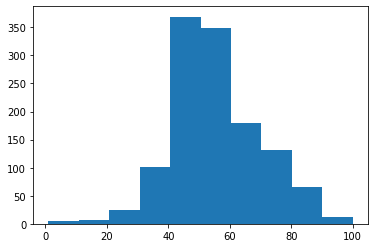

In [51]:
plt.hist(df['scaled_final_skor'])
plt.show()

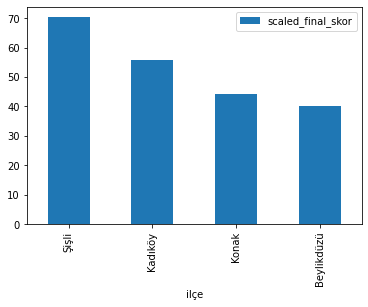

In [52]:
df.groupby("ilçe").agg({"scaled_final_skor":"mean"}).sort_values("scaled_final_skor", ascending = False).plot(kind='bar')
plt.show()